In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [2]:
from scipy.stats import norm
from scipy.integrate import quad

# Gamma Distribution

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


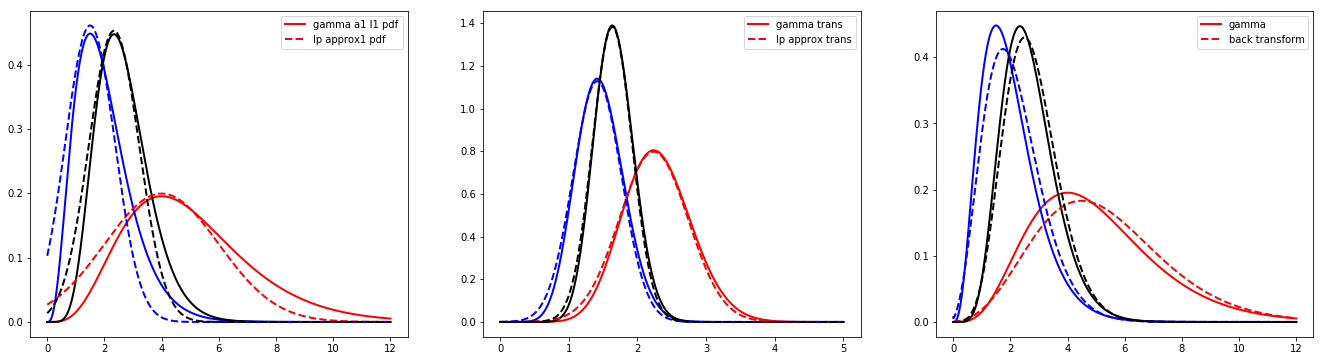

In [19]:
#change the basis, i.e. x -> t(x)
from scipy.special import gamma

###########SQUARE###################

def gamma_pdf(x, a, l):
    r = l**a/gamma(a) * (x ** (a-1)) * (np.exp(-x*l))
    return(r)

def gamma_pdf_trans(x, a, l):
    c = 1/2 * l**(-a-0.5) * gamma((2*a+1)/2)
    r = 1/c * (x**(2*a)) * (np.exp(- (x**2) * l))
    return(r)

    
"""Transforms"""
def gamma_mode(a, l):
    return((a-1)/l)

def gamma_trans_mode(a, l):
    return(np.sqrt(a/l))

def sigma_gamma(a,l):
    return((a-1)/l**2)

def sigma_gamma_trans(l):
    return(1/(4*l))

def square_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))

"""values"""

a1, l1 = 5,1
a2, l2 = 4,2
a3, l3 = 8,3

#normal
mode1 = gamma_mode(a1, l1)
mode2 = gamma_mode(a2, l2)
mode3 = gamma_mode(a3, l3)

sigma1 = np.sqrt(sigma_gamma(a1, l1))
sigma2 = np.sqrt(sigma_gamma(a2, l2))
sigma3 = np.sqrt(sigma_gamma(a3, l3))

x = np.linspace(0, 12, 12000 + 1)
x_trans = np.linspace(0, 5, 5000 + 1)
y1 = gamma_pdf(x, a1, l1)
y2 = gamma_pdf(x, a2, l2)
y3 = gamma_pdf(x, a3, l3)
lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

#transform

y1_trans = gamma_pdf_trans(x_trans, a1, l1)
y2_trans = gamma_pdf_trans(x_trans, a2, l2)
y3_trans = gamma_pdf_trans(x_trans, a3, l3)
mode1_trans = gamma_trans_mode(a1, l1)
mode2_trans = gamma_trans_mode(a2, l2)
mode3_trans = gamma_trans_mode(a3, l3)

sigma1_trans = np.sqrt(sigma_gamma_trans(l1))
sigma2_trans = np.sqrt(sigma_gamma_trans(l2))
sigma3_trans = np.sqrt(sigma_gamma_trans(l3))
lp_approx1_trans = norm.pdf(x_trans, loc=mode1_trans, scale=sigma1_trans) 
lp_approx2_trans = norm.pdf(x_trans, loc=mode2_trans, scale=sigma2_trans) 
lp_approx3_trans = norm.pdf(x_trans, loc=mode3_trans, scale=sigma3_trans)

#back transform
y1_back = square_normal_back(x, mode1_trans, sigma1_trans)
y2_back = square_normal_back(x, mode2_trans, sigma2_trans)
y3_back = square_normal_back(x, mode3_trans, sigma3_trans)

"""Plots"""
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
#first plot
axs[0].plot(x, y1, 'r-', lw=2, alpha=1, label='gamma a1 l1 pdf')
axs[0].plot(x, y2, 'b-', lw=2, alpha=1)#, label='gamma a2 l2 pdf')
axs[0].plot(x, y3, 'k-', lw=2, alpha=1)#, label='gamma a3 l3 pdf')
axs[0].plot(x, lp_approx1, 'r--', lw=2, alpha=1, label='lp approx1 pdf')
axs[0].plot(x, lp_approx2, 'b--', lw=2, alpha=1)#, label='lp approx2 pdf')
axs[0].plot(x, lp_approx3, 'k--', lw=2, alpha=1)#, label='lp approx3 pdf')
axs[0].legend();

#second plot
axs[1].plot(x_trans, y1_trans, 'r-', lw=2, alpha=1, label='gamma trans')
axs[1].plot(x_trans, y2_trans, 'b-', lw=2, alpha=1)#, label='gamma trans a2 l2 pdf')
axs[1].plot(x_trans, y3_trans, 'k-', lw=2, alpha=1)#, label='gamma trans a3 l3 pdf')
axs[1].plot(x_trans, lp_approx1_trans, 'r--', lw=2, alpha=1, label='lp approx trans')
axs[1].plot(x_trans, lp_approx2_trans, 'b--', lw=2, alpha=1)#, label='lp approx2 trans pdf')
axs[1].plot(x_trans, lp_approx3_trans, 'k--', lw=2, alpha=1)#, label='lp approx3 trans pdf')
axs[1].legend();

#"""
axs[2].plot(x, y1, 'r-', lw=2, label="gamma");
axs[2].plot(x, y2, 'b-', lw=2)#, label="exponential");
axs[2].plot(x, y3, 'k-', lw=2)#, label="exponential");
axs[2].plot(x, y1_back, 'r--', lw=2, label="back transform")
axs[2].plot(x, y2_back, 'b--', lw=2)#, label="back transform")
axs[2].plot(x, y3_back, 'k--', lw=2)#, label="back transform")
axs[2].legend();
#"""

plt.savefig('gamma_playground_sqrt.pdf')

In [26]:
# double check the integrals for the gamma distributions

gamma_int, err = quad(gamma_pdf, 0, 1000, args=(a1, l1))
print(gamma_int, err)
gamma_trans_int, err = quad(gamma_pdf_trans, 0, 1000, args=(a1, l1))
print(gamma_trans_int, err)

1.0 7.457975944848367e-12
1.0 1.2798399336849675e-09


In [65]:
def normal_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)**2/sigma**2)))

In [260]:
# Calculate the KL divergence of the distributions

def KL_div_gamma_normal(a, l):
    
    def f(x, a, l):
        p_x = gamma_pdf(x, a, l)
        if p_x < 10e-6: p_x = 10e-6
        log_p_x = np.log(p_x)

        mu = gamma_mode(a,l)
        sigma = np.sqrt(sigma_gamma(a,l))
        q_x = normal_pdf(x, mu, sigma)
        if q_x < 10e-6: q_x = 10e-6
        log_q_x = np.log(q_x)
        
        return(p_x * (log_p_x - log_q_x))
        
    KL_div, err = quad(f, 0.00001, 100, args=(a,l))
    
    return(KL_div, err)
    
def KL_div_gamma_normal_trans(a, l):
    
    c, _ = quad(gamma_pdf_trans, 0, 100, args=(a, l))
    
    def f(x, a, l):
        p_x = 1/c * gamma_pdf_trans(x, a, l)
        if p_x < 10e-6: p_x = 10e-6
        log_p_x = np.log(p_x)

        mu = gamma_trans_mode(a,l)
        sigma = np.sqrt(sigma_gamma_trans(l))
        q_x = normal_pdf(x, mu, sigma)
        if q_x < 10e-6: q_x = 10e-6
        log_q_x = np.log(q_x)
        
        return(p_x * (log_p_x - log_q_x))
        
    KL_div, err = quad(f, 0.00001, 100, args=(a,l))
    
    return(KL_div, err)

In [209]:
x = np.linspace(0.001, 12, 1000+1)

def plot_logs(a, l):
    
    p_x = gamma_pdf(x, a, l)
    log_p_x = np.log(p_x)

    mu = gamma_mode(a, l)
    sigma = np.sqrt(sigma_gamma(a, l))
    q_x = normal_pdf(x, mu, sigma)
    log_q_x = np.log(q_x)

    fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 6))

    axs[0].plot(x, p_x)
    axs[0].plot(x, q_x)

    #axs[1].plot(x, log_p_x)
    #axs[1].plot(x, log_q_x)
    #axs[1].plot(x, log_p_x - log_q_x)
    axs[1].plot(x, p_x * (log_p_x - log_q_x))
    
    print(np.sum(p_x * (log_p_x - log_q_x)))

In [210]:
x_t = np.linspace(0.001, 12, 1000+1)

def plot_logs_trans(a, l):
    
    c, _ = quad(gamma_pdf_trans, 0, 100, args=(a, l))
    p_x = 1/c * gamma_pdf_trans(x_t, a, l)
    log_p_x = np.log(p_x)

    mu = gamma_trans_mode(a, l)
    sigma = np.sqrt(sigma_gamma_trans(l))
    q_x = normal_pdf(x_t, mu, sigma)
    log_q_x = np.log(q_x)

    fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 6))

    axs[0].plot(x_t, p_x)
    axs[0].plot(x_t, q_x)

    #axs[1].plot(x, log_p_x)
    #axs[1].plot(x, log_q_x)
    #axs[1].plot(x, log_p_x - log_q_x)
    axs[1].plot(x_t, p_x * (log_p_x - log_q_x))
    
    print(np.sum(p_x * (log_p_x - log_q_x)))

In [221]:
# integrate the distribution in the new basis to check whether it is 1

print(quad(gamma_pdf, 0, 100, args=(a1,l1)))
print(quad(gamma_pdf, 0, 100, args=(a2,l2)))
print(quad(gamma_pdf, 0, 100, args=(a3,l3)))

print(quad(normal_pdf, 0, 100, args=(mode1_trans, sigma1_trans)))

(0.9999999999999998, 5.118472017722733e-14)
(1.0, 2.724401953669833e-14)
(1.0, 3.482615880293587e-09)
(0.9999961278917844, 7.3401742608306215e-09)


70.15395788639935


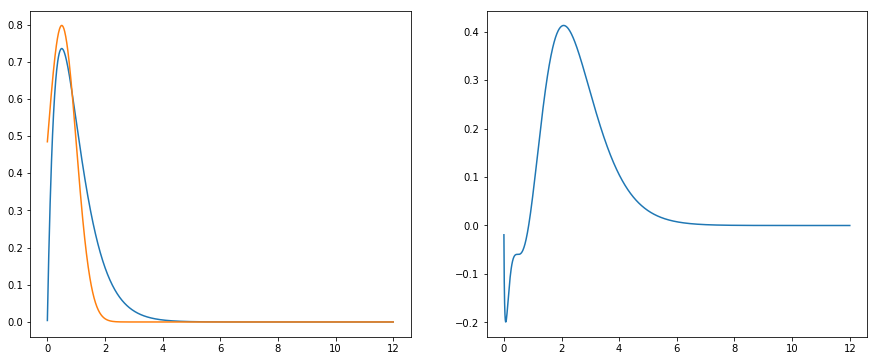

In [235]:
plot_logs(a1,l1)

0.9277732943947823


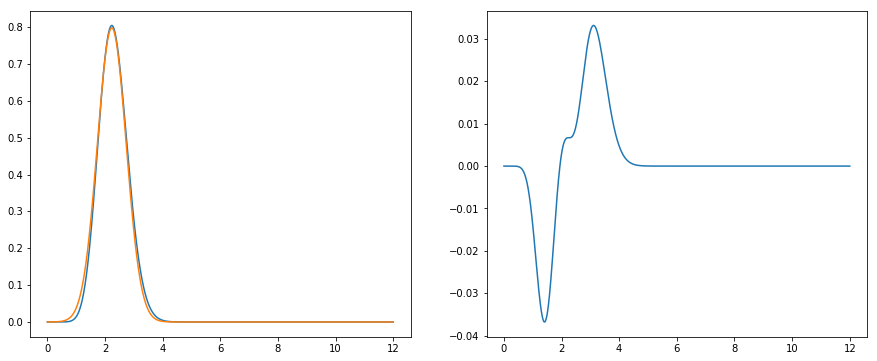

In [213]:
plot_logs_trans(a1,l1)

23.18235517082976


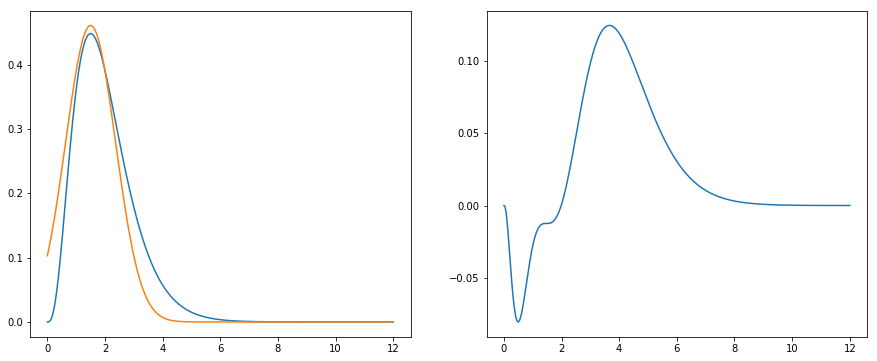

In [214]:
plot_logs(a2, l2)

1.1759666165267846


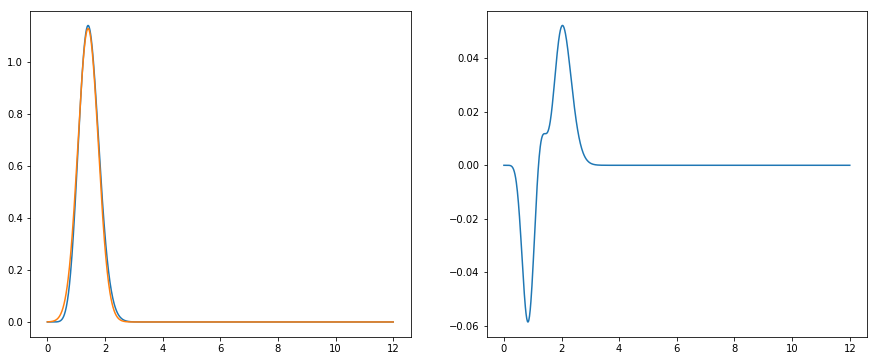

In [215]:
plot_logs_trans(a2, l2)

9.924121176184588


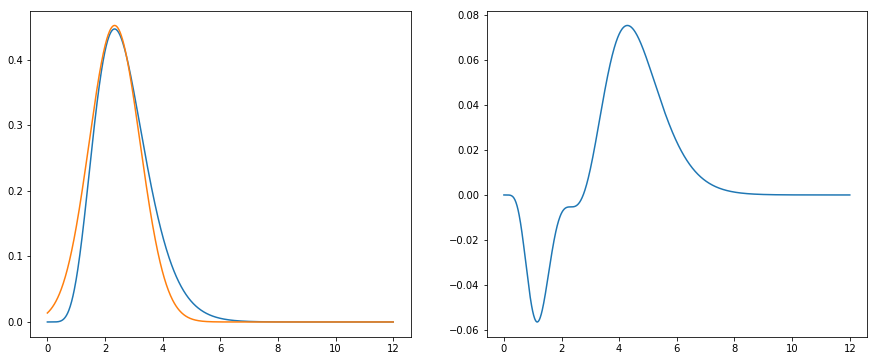

In [216]:
plot_logs(a3, l3)

0.5667351626926964


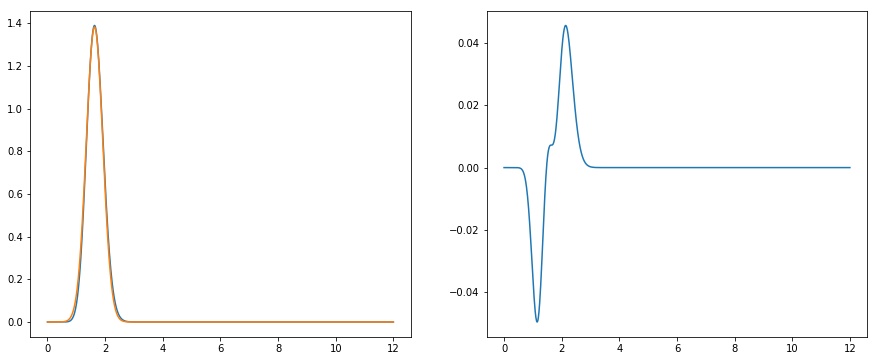

In [217]:
plot_logs_trans(a3, l3)

In [262]:
print(KL_div_gamma_normal(a1, l1))
print(KL_div_gamma_normal_trans(a1, l1))

(0.19462011914133312, 1.2933261656078443e-08)
(0.011104700646234105, 6.505276898757795e-09)


In [265]:
print(KL_div_gamma_normal(a2, l2))
print(KL_div_gamma_normal_trans(a2, l2))

(0.25893719332253, 9.297302538957553e-09)
(0.014087396397801407, 7.721803859522813e-09)


In [266]:
print(KL_div_gamma_normal(a3, l3))
print(KL_div_gamma_normal_trans(a3, l3))

(0.11538940754568551, 1.0073133530835753e-08)
(0.00678919168062631, 2.802666793089159e-09)


In [271]:
As = range(2, 12)
Ls = range(1, 11)

KL_div = 0
KL_div_trans = 0

for a in As:
    for l in Ls:
        
        #print(a, l)
        KL, _ = KL_div_gamma_normal(a, l)
        #print("KL: ", KL)
        KL_trans, _ = KL_div_gamma_normal_trans(a, l)
        KL_div += KL
        KL_div_trans += KL_trans
        
print(KL_div)
print(KL_div_trans)

22.416113163851485
1.1422657944822971


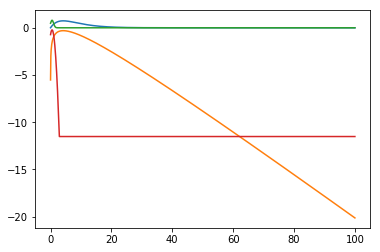

In [254]:
x_test = np.linspace(0.001, 100, 1000+1)
y1 = gamma_pdf(x, 2, 2)
y1_log = np.log(y1)

mu = gamma_mode(2,2)
sigma = np.sqrt(sigma_gamma(2, 2))
q_x = normal_pdf(x_test, mu, sigma)
q_x[q_x < 10e-6] = 10e-6
log_q_x = np.log(q_x)

plt.plot(x_test, y1)
plt.plot(x_test, y1_log)

plt.plot(x_test, q_x)
plt.plot(x_test, log_q_x)
